In [33]:
import math
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import time

from datetime import date, datetime, time, timedelta
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [34]:
data = pd.read_csv('VTI2.csv')

In [35]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-06-15,55.424999,56.005001,55.174999,55.665001,39.889877,1067400
1,2001-06-18,55.814999,55.915001,55.310001,55.310001,39.635471,282600
2,2001-06-19,56.150002,56.165001,55.235001,55.465000,39.746536,1777600
3,2001-06-20,55.375000,56.075001,55.375000,56.049999,40.165779,476000
4,2001-06-21,56.000000,56.724998,55.875000,56.500000,40.488239,240400


In [36]:
test_size = int(0.2*(len(data)))
cval_size = int(0.2*(len(data)))
train_size = len(data) - test_size - cval_size

In [37]:
data.loc[:, 'Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.columns = [str(x).lower().replace(' ', '_') for x in data.columns]
# data['month'] = data['date'].dt.month
data.sort_values(by='date', inplace=True, ascending=True)
data.head()

,date,open,high,low,close,adj_close,volume
0,2001-06-15,55.424999,56.005001,55.174999,55.665001,39.889877,1067400
1,2001-06-18,55.814999,55.915001,55.310001,55.310001,39.635471,282600
2,2001-06-19,56.150002,56.165001,55.235001,55.465000,39.746536,1777600
3,2001-06-20,55.375000,56.075001,55.375000,56.049999,40.165779,476000
4,2001-06-21,56.000000,56.724998,55.875000,56.500000,40.488239,240400


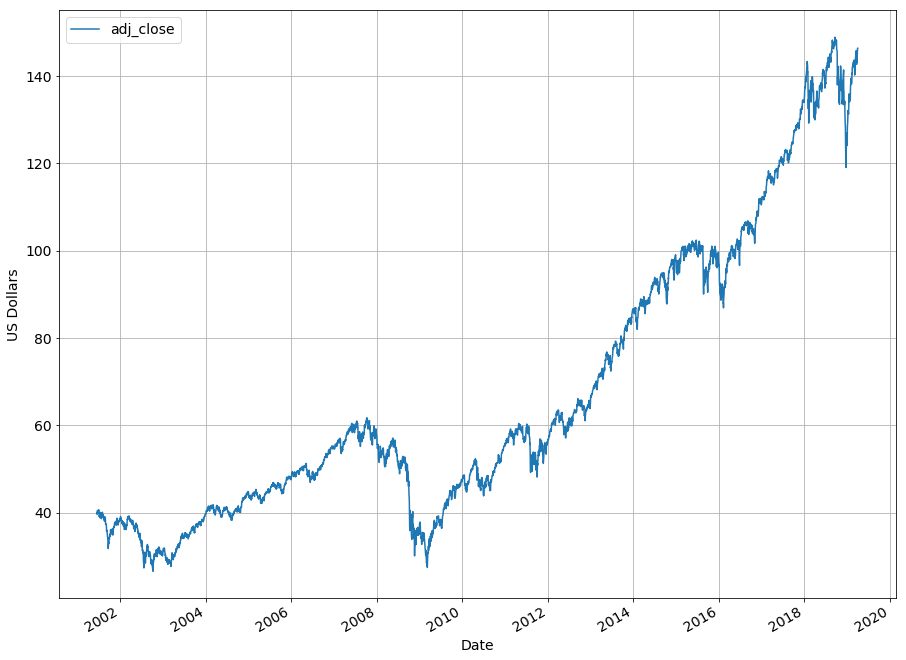

In [38]:
# Graphical Data

rcParams['figure.figsize'] = 15, 12 # width 10, height 8

ax = data.plot(x='date', y='adj_close', style='-', grid=True)
ax.set_xlabel("Date")
ax.set_ylabel("US Dollars")

In [39]:
# Spliting the dataset into 3 parts (60-20-20)

train = data[:train_size]
cv = data[train_size:train_size+cval_size]
train_cv = data[:train_size+cval_size]
test = data[train_size+cval_size:]

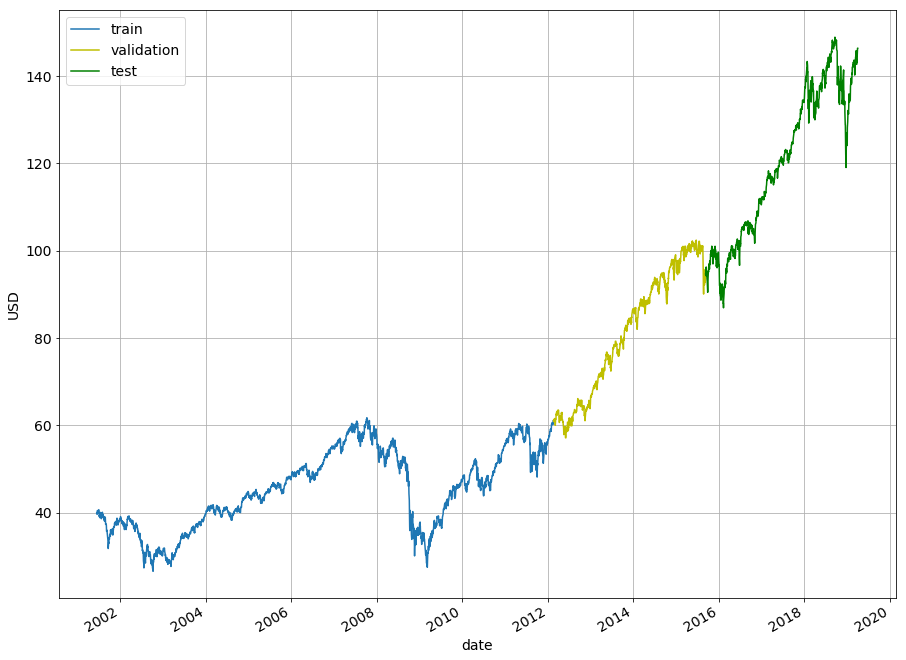

In [40]:
# Spliting the dataset into 3 parts (60-20-20) (Graph for dataset split)

rcParams['figure.figsize'] = 15, 12 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [41]:
# the main function which accepts the list of data points, window which is the time step, col is the column
# which we are trying to predict and test_i is the starting index of test index

def moving_average(lst, window, col, test_i):
    result = lst.loc[:,col].rolling(window=window, min_periods = 1).mean()
    result = result.iloc[:-1]
    result = np.concatenate((np.array([np.nan]), np.array(result)))
    result[result<0] = 0
    return result[test_i:]
# 0 1 2 3 4 5 6 7 8 9
# - 0 0.5 1 2 3 4 5 6 7

In [42]:
# mean average percentage error

def map_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs(actual-predicted)/actual)*100

In [43]:
# root mean square error

def rms_error(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

In [44]:
# running the loop from N=1 to N=50 (time step) to obtain the optimal hyperparameter

RMSE, MAPE = [], []
for i in tqdm(range(1, 51)):
    pred_list = moving_average(train_cv, i, 'adj_close', train_size)
    cv.loc[:,'pred_n'+str(i)] = pred_list
    RMSE.append(rms_error(cv.loc[:,'adj_close'], cv.loc[:,'pred_n'+str(i)]))
    MAPE.append(map_error(cv.loc[:,'adj_close'], cv.loc[:,'pred_n'+str(i)]))
    print(i, RMSE[-1], MAPE[-1])

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
  2%|▏         | 1/50 [00:00<00:06,  7.81it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launc

1 0.6630276556815886 0.5983293992681795
2 0.751622173576705 0.6754466293501854
3

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
  6%|▌         | 3/50 [00:00<00:05,  8.21it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 

 0.8407574480123834 0.7643603787046959
4 0.9193725088200783 0.8448308327032059
5 0.9816300027989306 0.9115234945236491


 12%|█▏        | 6/50 [00:00<00:05,  8.77it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 14%|█▍        | 7/50 [00:00<00:04,  8.65it/s]/usr/local/lib/python3.5/dist-packages/ipykern

6 1.0342935585967241 0.9644013589476305
7 1.0816968343877023 1.0108864775309745
8 1.1259501267984944 1.0510799495914003


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 18%|█▊        | 9/50 [00:01<00:04,  9.11it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid valu

9 1.171015205305433 1.0915710585408067
10 1.214772818418297 1.134212234167678
11 1.257610570255108 1.1820672629540114


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 24%|██▍       | 12/50 [00:01<00:04,  8.90it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

12 1.2987618757506356 1.2281562830924257
13 1.3384415884370608 1.2743637234056324
14 1.3764296505824207 1.3177787915337726


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 30%|███       | 15/50 [00:01<00:03,  8.87it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

15 1.4126563844846929 1.3581067577284882
16 1.4466020002379543 1.396416680243325
17 1.4789236581117422 1.4339005400501725


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 36%|███▌      | 18/50 [00:02<00:03,  8.85it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

18 1.510370209401132 1.4709038738502536
19 1.5411123545733905 1.5075297679468276


 40%|████      | 20/50 [00:02<00:03,  9.18it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 42%|████▏     | 21/50 [00:02<00:03,  9.25it/s]/usr/local/lib/python3.5/dist-packages/ipyke

20 1.5704613907976637 1.5436793865447245
21 1.5990836931360588 1.5789206694257578
22 1.627558229813235 1.6131893197588847


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 46%|████▌     | 23/50 [00:02<00:02,  9.01it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:

23 1.6554218800742568 1.6464841109935302
24 1.6826311996256134 1.6786978792240088


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 50%|█████     | 25/50 [00:02<00:02,  8.92it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning:

25 1.7095459565857283 1.7115217700961864
26 1.735413370896724 1.7436967900281202
27 1.760489042991942 1.7749966363771943


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 56%|█████▌    | 28/50 [00:03<00:02,  8.95it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

28 1.7846810730709248 1.8045516022355879
29 1.8080970162293672 1.8323190977838681
30 1.830919626011481 1.8602271435063027


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 62%|██████▏   | 31/50 [00:03<00:02,  8.76it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

31 1.8528047613083443 1.8868937418508875
32 1.8737887438857137 1.912435151657908
33 1.8938334330176334 1.9371430069914324


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 68%|██████▊   | 34/50 [00:03<00:01,  8.28it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

34 1.913221852547797 1.9610408234431493
35 1.9322710356736912 1.9843271647041467


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 72%|███████▏  | 36/50 [00:04<00:01,  8.39it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:

36 1.9507559859343564 2.0062241373017033
37 1.968759708738255 2.0280680773207003
38 1.9862638419354137 2.0499524334910877


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 78%|███████▊  | 39/50 [00:04<00:01,  8.67it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

39 2.003496312000354 2.0715261637087337
40 2.0207049199394467 2.093151573372779
41 2.037977857121473 2.1152929371006235


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 84%|████████▍ | 42/50 [00:04<00:00,  9.09it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

42 2.0555428660593544 2.137144762800203
43 2.0734599238312663 2.1596751906995246
44 2.091682893252761 2.182447895957576


 88%|████████▊ | 44/50 [00:04<00:00,  9.33it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 90%|█████████ | 45/50 [00:05<00:00,  9.05it/s]/usr/local/lib/python3.5/dist-packages/ipyke

45 2.1103299397428192 2.205605667448568
46 2.129401268145511 2.228902984698598
47 2.148606817995284 2.251669496499871


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
 96%|█████████▌| 48/50 [00:05<00:00,  8.80it/s]/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid val

48 2.168152090971477 2.2749792721681485
49 2.1880421949608118 2.2983697648061194
50 2.2080568208643365 2.3218284847833637


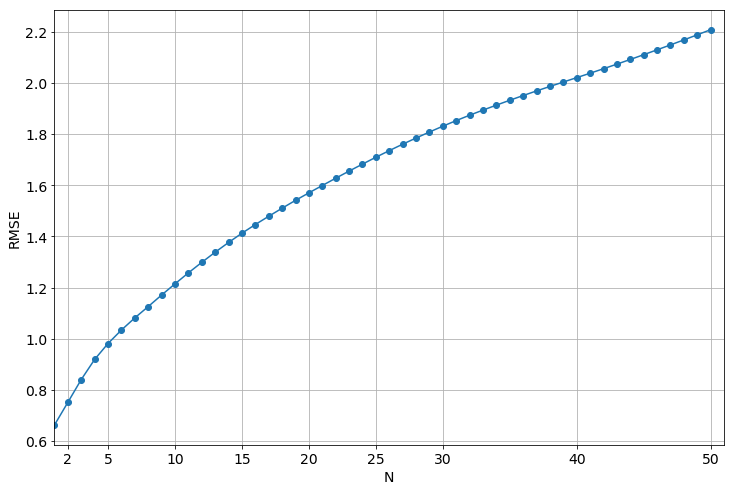

In [45]:
# Root Mean Square Error VS Time Step

plt.figure(figsize=(12, 8))
plt.plot(range(1, 51), RMSE, 'o-')
plt.grid()
plt.xlabel('N')
plt.ylabel('RMSE')
plt.xlim([1, 51])
plt.xticks([2, 5, 10, 15, 20, 25, 30, 40, 50])
matplotlib.rcParams.update({'font.size': 14})
# fig.savefig('moving-average-VTI-RMSE-vs-N.png')

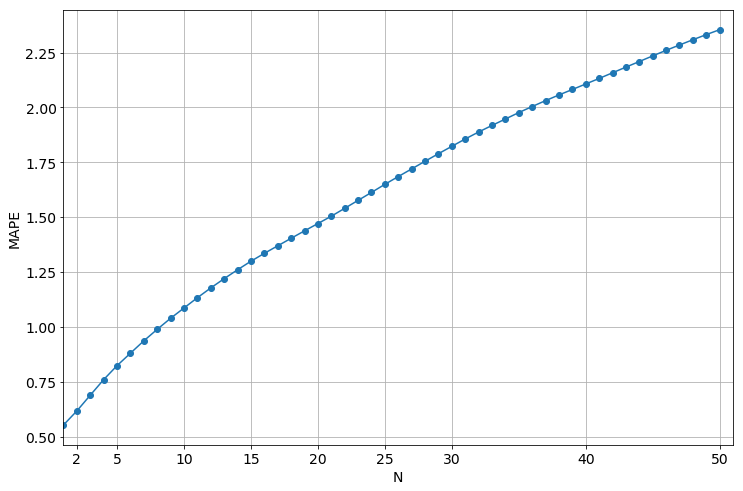

In [17]:
# Mean Absolute Percentage Error

plt.figure(figsize=(12, 8))
plt.plot(range(1, 51), MAPE, 'o-')
plt.grid()
plt.xlabel('N')
plt.ylabel('MAPE')
plt.xlim([1, 51])
plt.xticks([2, 5, 10, 15, 20, 25, 30, 40, 50])
matplotlib.rcParams.update({'font.size': 14})

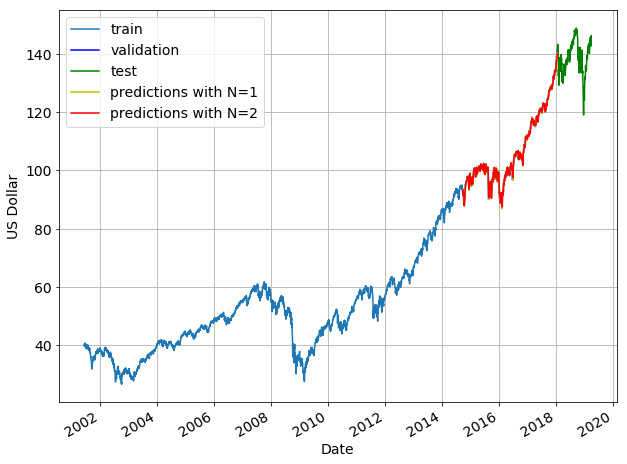

In [18]:
# Validation Set Prediction

rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='adj_close', style='-', grid=True)
ax = cv.plot(x='date', y='adj_close', style='b-', grid=True, ax=ax)
ax = test.plot(x='date', y='adj_close', style='g-', grid=True, ax=ax)
ax = cv.plot(x='date', y='pred_n1', style='y-', grid=True, ax=ax)
ax = cv.plot(x='date', y='pred_n2', style='r-', grid=True, ax=ax)
ax.legend(['train', 'validation', 'test', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("Date")
ax.set_ylabel("US Dollar")

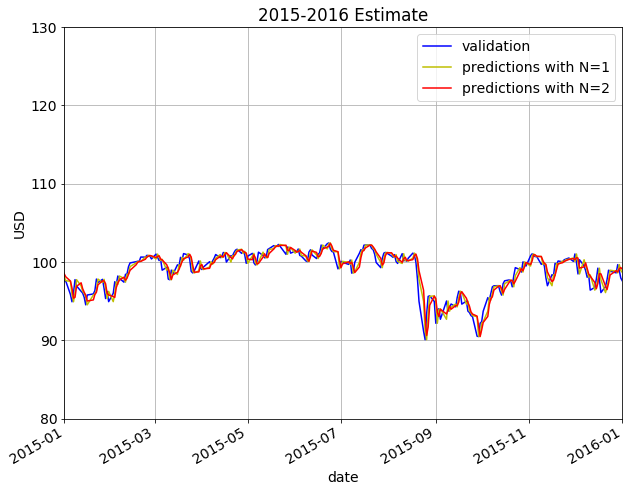

In [22]:
# Zoomed into only the validation set

rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = cv.plot(x='date', y='adj_close', style='b-', grid=True)
ax = cv.plot(x='date', y='pred_n1', style='y-', grid=True, ax=ax)
ax = cv.plot(x='date', y='pred_n2', style='r-', grid=True, ax=ax)
ax.legend(['validation', 'predictions with N=1', 'predictions with N=2'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2015, 1, 1), date(2016, 1, 1)])
ax.set_ylim([80, 130])
ax.set_title('2015-2016 Estimate')

In [21]:
# For N=2 (optimal time step), running the model on test dataset

pred_list = moving_average(data, 2, 'adj_close', train_size+cval_size)
test.loc[:,'pred_n'+str(2)] = pred_list
rmse=(rms_error(test.loc[:,'adj_close'], test.loc[:,'pred_n'+str(2)]))
mape=(map_error(test.loc[:,'adj_close'], test.loc[:,'pred_n'+str(2)]))
print(rmse, mape)

1.5636284470328632 0.8416615283023386


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(115, 155)

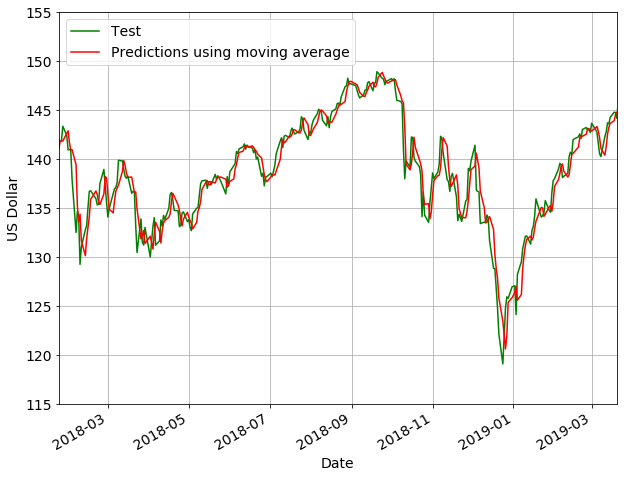

In [23]:
# Test Set Prediction

rcParams['figure.figsize'] = 10, 8 # width 10, height 8
matplotlib.rcParams.update({'font.size': 14})

ax = test.plot(x='date', y='adj_close', style='g-', grid=True)
ax = test.plot(x='date', y='pred_n2', style='r-', grid=True, ax=ax)
ax.legend(['Test', 'Predictions using moving average'], loc='upper left')
ax.set_xlabel("Date")
ax.set_ylabel("US Dollar")
ax.set_xlim([date(2018, 1, 23), date(2019, 3, 20)])
ax.set_ylim([115, 155])